Mean Reversion Trading Strategy

In [19]:
#Modules & Packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 

from datetime import date
import pandas_datareader.data as web
yf.pdr_override()
plt.style.use('fivethirtyeight')

In [20]:
#Data Collection Function 
def get_data(assets = assets_interest, start = start_date, end = end_date):
    data = web.get_data_yahoo(assets, data_source = 'yahoo', start = start, end = end)
    return data

2022-06-05


In [24]:
assets_interest = ['BTC-USD']
start_date = date(2018, 1, 1)
end_date = date.today()
print(end_date)

data = get_data(assets_interest)
data.to_csv('BTC_Daily_OHLC_Since_2018.csv')
data.head(3)

2022-06-05
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160


In [25]:
#Sinmple Moving Average Function 

def SMA(data, period = 30, column = 'Close'):
    return data[column].rolling(window = period).mean()

In [34]:
#Build and show the data set with the calculations needed to check the startegy

data['Simple M.A'] = SMA(data, 21)
data['Simple_Returns'] = data.pct_change(1)['Close']
data['Log_Returns'] = np.log(1 + data['Simple_Returns'])
data['Ratios'] = data['Close'] / data['Simple M.A']

#Let's check the dataset so far
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Simple M.A,Simple Returns,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,,
2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341,29800.361886,-0.062695,-0.062695,-0.064747,0.999957
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061,29867.968378,0.022430,0.022430,0.022183,1.020072
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,29888.029669,-0.025046,-0.025046,-0.025365,0.993856
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958,29875.251023,0.004327,0.004327,0.004317,0.998583
2022-06-05,29836.292969,30112.359375,29582.658203,29857.443359,29857.443359,16626111488,29806.314360,0.000822,0.000822,0.000822,1.001715


In [35]:
data['Ratios'].describe()

count    1597.000000
mean        1.007618
std         0.103550
min         0.573385
25%         0.945650
50%         1.001913
75%         1.069327
max         1.409556
Name: Ratios, dtype: float64

In [40]:
#Compute and show the percentile values

percentiles = [15, 20, 50, 80, 85]

#Remove NA values in the ratios columns and store results in a new variable
ratios = data['Ratios'].dropna()

#Get the values of the percentiles
percentile_values = np.percentile(ratios, percentiles)
percentile_values


array([0.9082707 , 0.92896554, 1.00191328, 1.0876402 , 1.10767721])

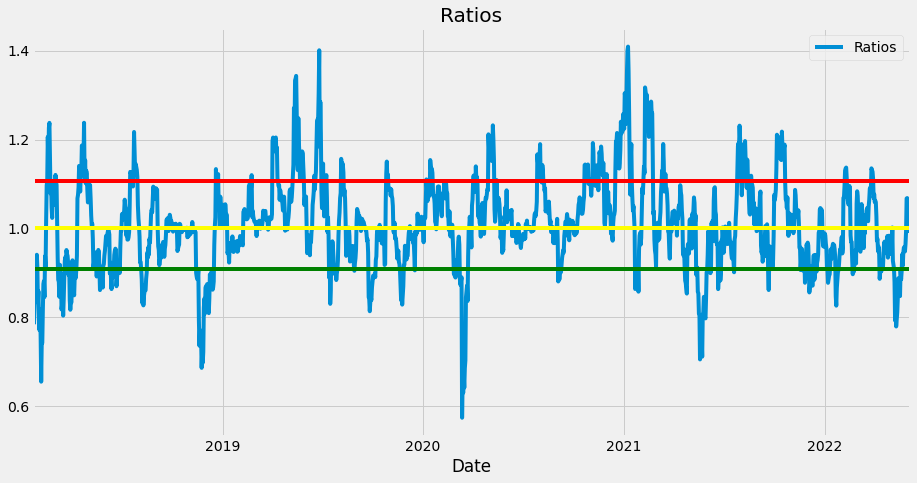

In [44]:
#Plot the ratios 
plt.figure(figsize=(14,7))
plt.title("Ratios")
data['Ratios'].dropna().plot(legend = True)
plt.axhline(percentile_values[0], c = 'green', label = '15th percentile')
plt.axhline(percentile_values[2], c = 'yellow', label = '50th percentile')
plt.axhline(percentile_values[-1], c = 'red', label = '85th percentile')